## Working on the Task 2

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-12-31'

historical_data = {}
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)

    # Check if data is empty
    if data.empty:
        print(f"No data fetched for {ticker}.")
    else:
        historical_data[ticker] = data['Adj Close']  # Store only adjusted close prices

# Print historical data to check structure
print("\nHistorical Data:")
for ticker, series in historical_data.items():
    print(f"{ticker} data:")
    print(series.head())  # Print first few rows of each

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Historical Data:
TSLA data:
Ticker                          TSLA
Date                                
2015-01-02 00:00:00+00:00  14.620667
2015-01-05 00:00:00+00:00  14.006000
2015-01-06 00:00:00+00:00  14.085333
2015-01-07 00:00:00+00:00  14.063333
2015-01-08 00:00:00+00:00  14.041333
BND data:
Ticker                           BND
Date                                
2015-01-02 00:00:00+00:00  63.358761
2015-01-05 00:00:00+00:00  63.542702
2015-01-06 00:00:00+00:00  63.726707
2015-01-07 00:00:00+00:00  63.765034
2015-01-08 00:00:00+00:00  63.665401
SPY data:
Ticker                            SPY
Date                                 
2015-01-02 00:00:00+00:00  173.173752
2015-01-05 00:00:00+00:00  170.046295
2015-01-06 00:00:00+00:00  168.444656
2015-01-07 00:00:00+00:00  170.543640
2015-01-08 00:00:00+00:00  173.569931


In [ ]:
try:
    combined_data = pd.concat(historical_data.values(), axis=1)
    combined_data.columns = historical_data.keys()  # Set the column names
    print("\nCombined Data:")
    print(combined_data.head())
except ValueError as e:
    print(f"Error creating DataFrame with concat: {e}")


Combined Data:
                                TSLA        BND         SPY
Date                                                       
2015-01-02 00:00:00+00:00  14.620667  63.358761  173.173752
2015-01-05 00:00:00+00:00  14.006000  63.542702  170.046295
2015-01-06 00:00:00+00:00  14.085333  63.726707  168.444656
2015-01-07 00:00:00+00:00  14.063333  63.765034  170.543640
2015-01-08 00:00:00+00:00  14.041333  63.665401  173.569931


In [ ]:
print(combined_data.describe())

              TSLA          BND          SPY
count  2481.000000  2481.000000  2481.000000
mean    111.890274    70.096921   311.018675
std     110.302138     4.885156   112.024013
min       9.578000    62.637531   157.328537
25%      17.086000    66.327988   214.852310
50%      25.166000    68.914581   276.051056
75%     217.733337    73.801575   402.683716
max     409.970001    79.812935   598.190002


In [ ]:
print("\nMissing values:")
print(combined_data.isnull().sum())


Missing values:
TSLA    0
BND     0
SPY     0
dtype: int64


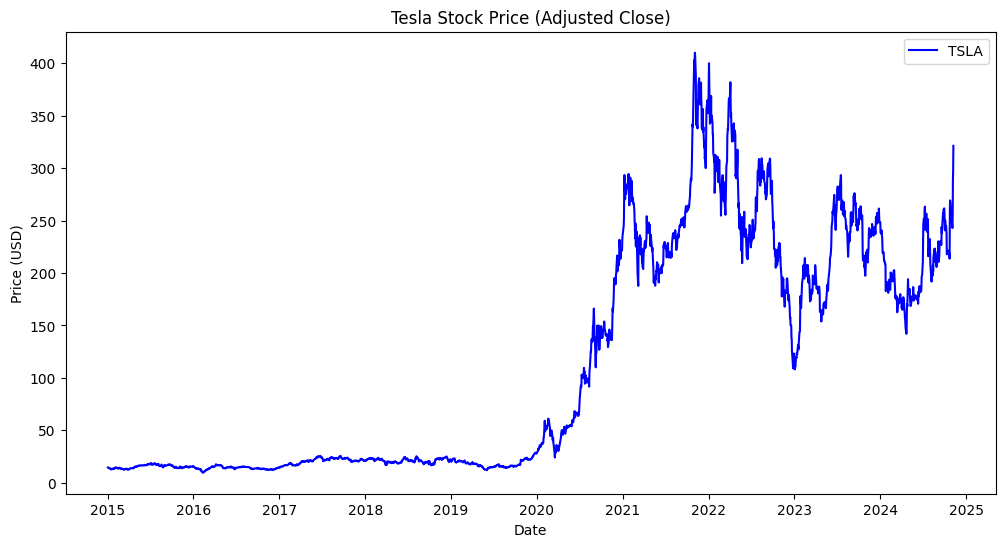

In [ ]:
import matplotlib.pyplot as plt

# Plot the Tesla stock price
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], color='blue', label='TSLA')
plt.title('Tesla Stock Price (Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Handle missing values
combined_data.fillna(method='ffill', inplace=True)

# Check for stationarity
adf_result = adfuller(combined_data['TSLA'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is not stationary. Applying differencing.")
    combined_data['TSLA_diff'] = combined_data['TSLA'].diff().dropna()
else:
    combined_data['TSLA_diff'] = combined_data['TSLA']


<ipython-input-11-82f94f1f54cc>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


ADF Statistic: -0.8369069254990755
p-value: 0.8080398817868184
The series is not stationary. Applying differencing.


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Handle missing values
combined_data.fillna(method='ffill', inplace=True)

# Check for stationarity
adf_result = adfuller(combined_data['TSLA'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is not stationary. Applying differencing.")
    combined_data['TSLA_diff'] = combined_data['TSLA'].diff()
    combined_data.dropna(subset=['TSLA_diff'], inplace=True)  # Drop NaN values from differencing
else:
    combined_data['TSLA_diff'] = combined_data['TSLA']


<ipython-input-12-bfd1d7c7f470>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


ADF Statistic: -0.8369069254990755
p-value: 0.8080398817868184
The series is not stationary. Applying differencing.


In [ ]:
# Apply first differencing
combined_data['TSLA_diff'] = combined_data['TSLA'].diff()
combined_data.dropna(subset=['TSLA_diff'], inplace=True)  # Remove NaN values from differencing

# Re-check for stationarity on the differenced series
adf_result_diff = adfuller(combined_data['TSLA_diff'])
print("ADF Statistic after differencing:", adf_result_diff[0])
print("p-value after differencing:", adf_result_diff[1])

if adf_result_diff[1] <= 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still not stationary. Further differencing may be required.")


ADF Statistic after differencing: -9.923103674022059
p-value after differencing: 2.955043527366113e-17
The differenced series is stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                            TSLA_diff   No. Observations:                 2479
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -7958.637
Date:                              Mon, 11 Nov 2024   AIC                          15931.275
Time:                                      13:13:34   BIC                          15971.947
Sample:                                           0   HQIC                         15946.051
                                             - 2479                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0118      0.019    -53.256      0.000      -1.049      -0.975
ar.L2         -0.02

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


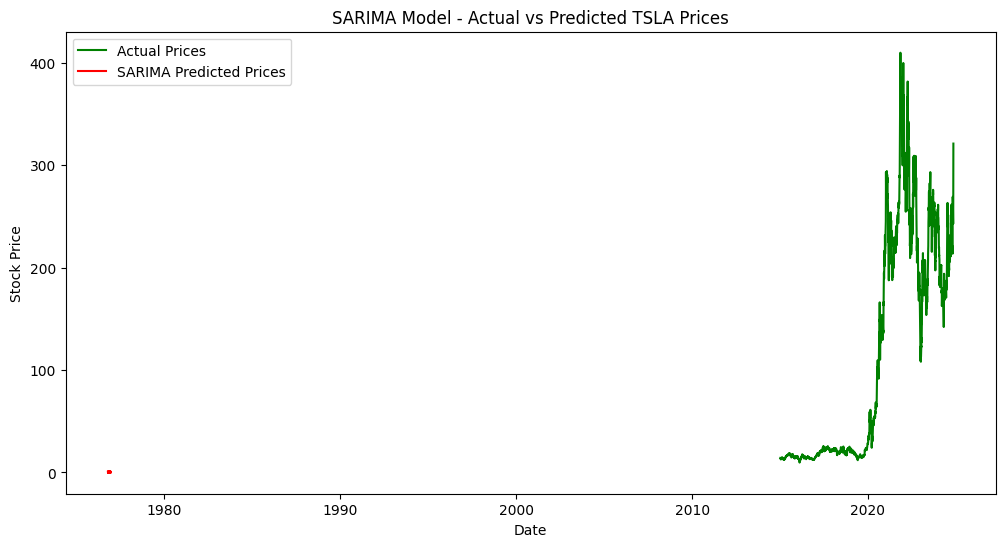

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMA model
sarima_model = SARIMAX(combined_data['TSLA_diff'].dropna(), order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

# Forecast future values
sarima_forecast = sarima_results.get_forecast(steps=60)
sarima_predicted = sarima_forecast.predicted_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], label='Actual Prices', color='green')
plt.plot(sarima_predicted, label='SARIMA Predicted Prices', color='red')
plt.title("SARIMA Model - Actual vs Predicted TSLA Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyst8xqab/p8jekosu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyst8xqab/ic4mh3bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86549', 'data', 'file=/tmp/tmpyst8xqab/p8jekosu.json', 'init=/tmp/tmpyst8xqab/ic4mh3bw.json', 'output', 'file=/tmp/tmpyst8xqab/prophet_model3akn7wns/prophet_model-20241111131758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


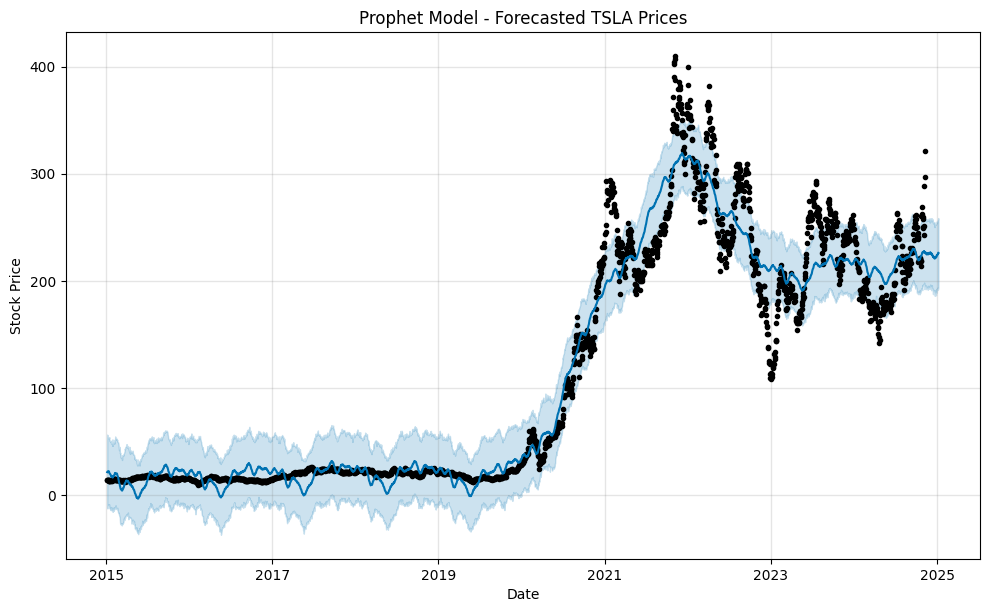

In [ ]:



from prophet import Prophet

# Prepare data for Prophet
prophet_df = combined_data['TSLA'].reset_index().rename(columns={'Date': 'ds', 'TSLA': 'y'})

# Convert 'ds' column to datetime objects and remove timezone information
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)

# Define and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast future values
future_dates = prophet_model.make_future_dataframe(periods=60)
forecast = prophet_model.predict(future_dates)

# Plot forecast
prophet_model.plot(forecast)
plt.title("Prophet Model - Forecasted TSLA Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0284
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0014
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0011
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0010
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 9.7837e-04
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 7.7186e-04
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 7.6503e-04
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 6.5416e-04
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 6.0503e-04
Epoch 10/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 6.0574e-04
Epoch 11/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 5.2316e-04
Epoch 12/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 5.2343e-04
Epoch 13/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 4.9032e-04
Epoch 14/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 5.2213e-04
Epoch 15/20
76/76 ━━━━━━━━━━━━

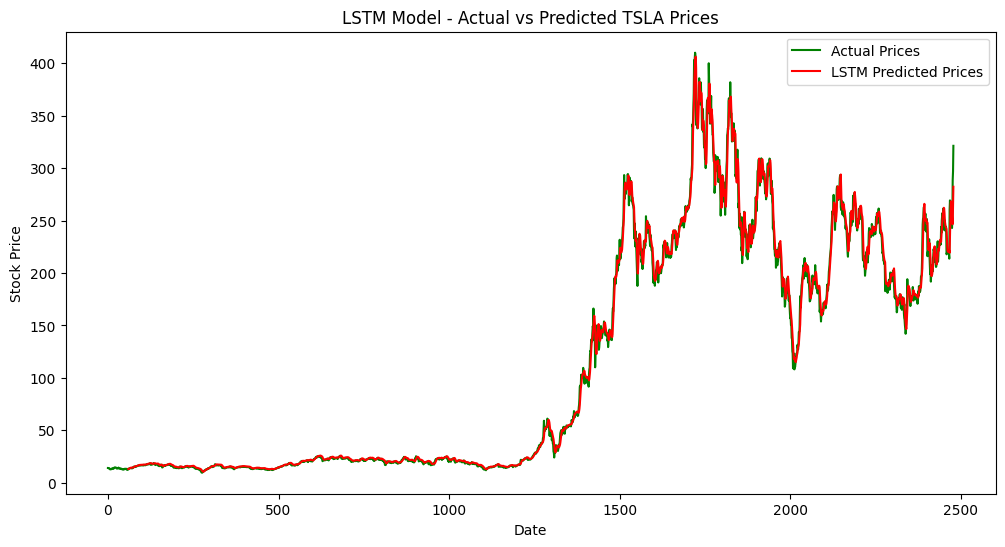

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data['TSLA'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
X, y = [], []
lookback = 60
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

# Make predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'].values, color='green', label='Actual Prices')
plt.plot(np.arange(lookback, len(predicted_prices) + lookback), predicted_prices, color='red', label='LSTM Predicted Prices')
plt.title("LSTM Model - Actual vs Predicted TSLA Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

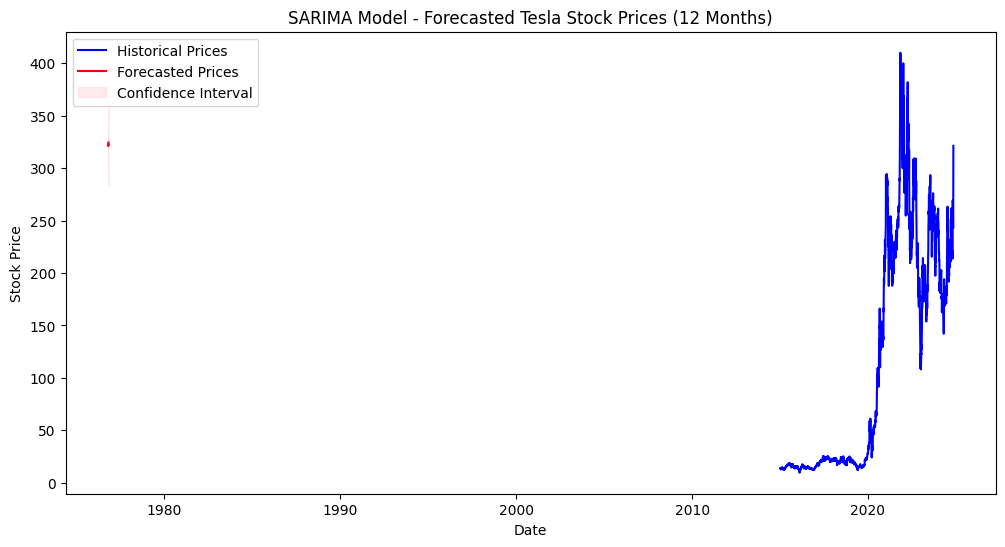

2479    321.705644
2480    322.580585
2481    322.126029
2482    322.277511
2483    321.803224
2484    321.519503
2485    322.944571
2486    321.770241
2487    322.872147
2488    323.468804
2489    323.492562
2490    324.381056
Name: predicted_mean, dtype: float64
Confidence Intervals:
       lower TSLA  upper TSLA
2479  309.967111  333.444176
2480  306.021642  339.139527
2481  301.732003  342.520054
2482  298.824082  345.730939
2483  295.499412  348.107037
2484  292.744224  350.294782
2485  291.858461  354.030682
2486  288.507749  355.032732
2487  287.637862  358.106431
2488  286.276144  360.661464
2489  284.524489  362.460635
2490  283.657970  365.104141


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Retraining the SARIMA model with optimized parameters (update as needed)
sarima_model = SARIMAX(combined_data['TSLA'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Forecast for the next 12 months (adjust steps as needed)
forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the forecast alongside historical data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], label='Historical Prices', color='blue')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecasted Prices')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title("SARIMA Model - Forecasted Tesla Stock Prices (12 Months)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Printing the forecast values
print(forecast_values)
print("Confidence Intervals:\n", confidence_intervals)


## Forecast Using LSTM Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<ipython-input-22-ef5eb5a916df>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=combined_data.index[-1], periods=13, freq='M')[1:], predictions, color='red', marker='o', label='LSTM Forecasted Prices')


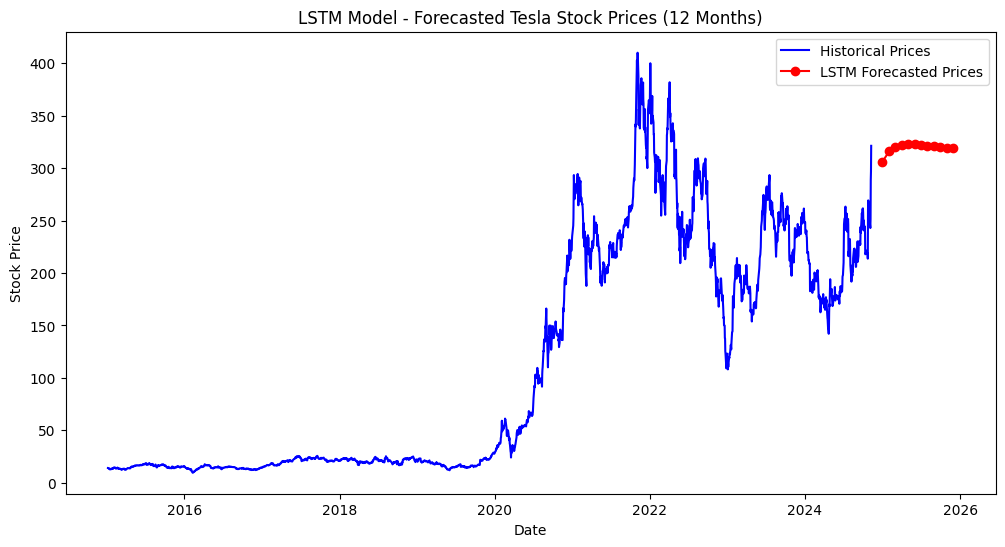

LSTM Forecasted Prices:
 [306.05276 315.81027 320.3173  322.36023 323.04608 322.9165  322.32
 321.5126  320.6773  319.92975 319.32758 318.88336]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data preparation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data['TSLA'].values.reshape(-1, 1))

# Preparing the input sequences for forecasting (using lookback of 60 days)
lookback = 60
X_test = scaled_data[-lookback:].reshape(1, lookback, 1)

# Forecast for the next 12 months (12 steps ahead)
predictions = []
for _ in range(12):
    next_pred = model.predict(X_test)
    predictions.append(next_pred[0, 0])
    # Update the input sequence for the next prediction
    X_test = np.append(X_test[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], color='blue', label='Historical Prices')
plt.plot(pd.date_range(start=combined_data.index[-1], periods=13, freq='M')[1:], predictions, color='red', marker='o', label='LSTM Forecasted Prices')
plt.title("LSTM Model - Forecasted Tesla Stock Prices (12 Months)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Printing the LSTM predictions
print("LSTM Forecasted Prices:\n", predictions.flatten())


## Working on the Model using LSTM Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0248
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0013
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.7971e-04
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8.4151e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 8.0809e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 6.9669e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 6.9649e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 5.8925e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 6.3850e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 5.1819e-04
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 5.0281e-04
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.8032e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 4.7814e-04
Epoch 15/20
61/61 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

<ipython-input-23-0e91dc26150b>:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=combined_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


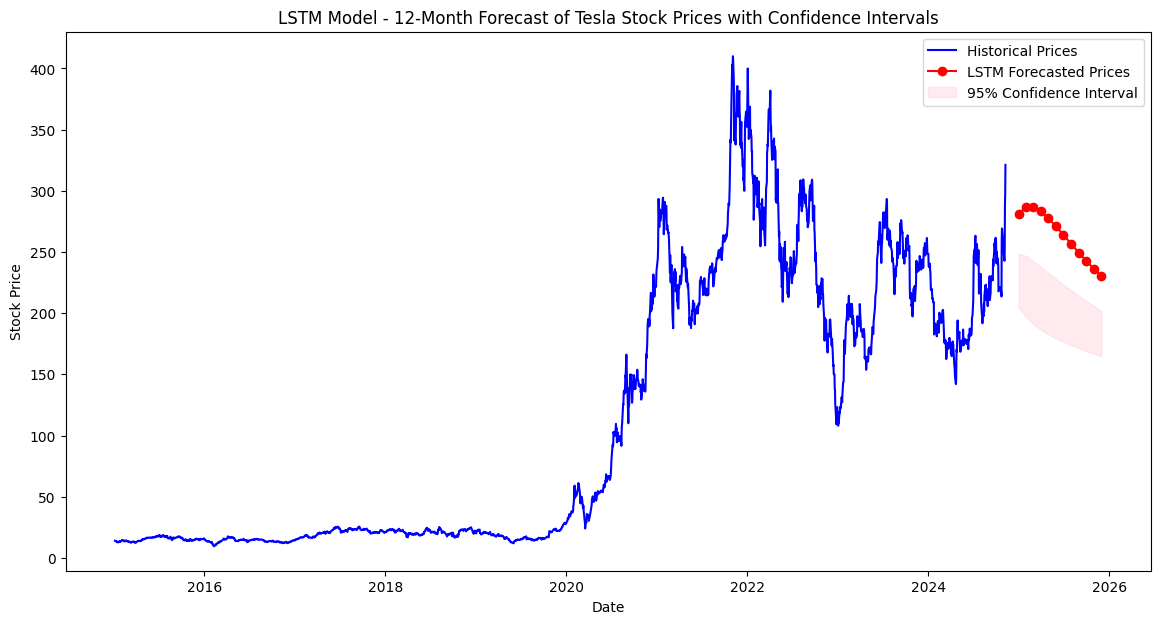

                           Forecasted Prices  Lower Bound  Upper Bound
2024-12-31 00:00:00+00:00         280.793732   204.938144   248.460091
2025-01-31 00:00:00+00:00         287.159241   196.805727   246.725027
2025-02-28 00:00:00+00:00         286.871307   191.014998   242.419133
2025-03-31 00:00:00+00:00         283.171448   186.393129   237.678636
2025-04-30 00:00:00+00:00         277.611786   182.599426   232.834029
2025-05-31 00:00:00+00:00         271.025269   179.368434   228.027945
2025-06-30 00:00:00+00:00         263.929260   176.524468   223.349639
2025-07-31 00:00:00+00:00         256.683472   173.940278   218.790136
2025-08-31 00:00:00+00:00         249.546555   171.519539   214.362441
2025-09-30 00:00:00+00:00         242.697433   169.190183   210.072959
2025-10-31 00:00:00+00:00         236.248047   166.909542   205.923809
2025-11-30 00:00:00+00:00         230.254364   164.665910   201.914608


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Step 1: Data Preparation
data = combined_data['TSLA'].values.reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the lookback period (e.g., last 60 days)
lookback = 60
X_test = scaled_data[-lookback:].reshape(1, lookback, 1)

# Step 2: Load the Pre-trained LSTM Model
try:
    model = load_model('lstm_model.h5')  # Update with your model file path
except:
    # If the model is not available, define and train a new LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Split data for training (80% train, 20% test)
    train_size = int(len(scaled_data) * 0.8)
    X_train, y_train = [], []
    for i in range(lookback, train_size):
        X_train.append(scaled_data[i-lookback:i, 0])
        y_train.append(scaled_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1, 1)

    # Reshape for LSTM input
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=20, batch_size=32)
    model.save('lstm_model.h5')

# Step 3: Generate Forecast for the Next 12 Months
forecast_steps = 12
predictions = []
for _ in range(forecast_steps):
    next_pred = model.predict(X_test)[0, 0]
    predictions.append(next_pred)
    # Update the input for the next step prediction
    X_test = np.append(X_test[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Step 4: Calculate Confidence Intervals using Bootstrapping
# Generating 100 bootstrap samples for confidence intervals
bootstrap_preds = []
for _ in range(100):
    noise = np.random.normal(0, 0.05, size=X_test.shape)  # Add some noise
    bootstrap_X = X_test + noise
    bootstrap_pred = []
    for _ in range(forecast_steps):
        next_pred = model.predict(bootstrap_X)[0, 0]
        bootstrap_pred.append(next_pred)
        bootstrap_X = np.append(bootstrap_X[:, 1:, :], [[[next_pred]]], axis=1)
    bootstrap_preds.append(scaler.inverse_transform(np.array(bootstrap_pred).reshape(-1, 1)).flatten())

# Calculate 95% confidence intervals
bootstrap_preds = np.array(bootstrap_preds)
lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)

# Step 5: Visualization
forecast_dates = pd.date_range(start=combined_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

plt.figure(figsize=(14, 7))
plt.plot(combined_data['TSLA'], color='blue', label='Historical Prices')
plt.plot(forecast_dates, predictions.flatten(), color='red', marker='o', label='LSTM Forecasted Prices')
plt.fill_between(forecast_dates, lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title("LSTM Model - 12-Month Forecast of Tesla Stock Prices with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Print the forecasted prices and confidence intervals
forecast_df = pd.DataFrame({
    "Forecasted Prices": predictions.flatten(),
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound
}, index=forecast_dates)

print(forecast_df)


In [ ]:
import pmdarima as pm

# Auto ARIMA model selection
auto_arima_model = pm.auto_arima(tsla_diff, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Display the selected model parameters
print("Best model parameters (p, d, q):", auto_arima_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=15905.719, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15927.666, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15928.563, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15928.606, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=15930.279, Time=0.87 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=15930.298, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=15932.913, Time=2.00 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=15907.378, Time=5.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=15928.696, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=15931.751, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=15931.997, Time=1.17 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=3.81 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15906.680, Time=8.09 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 25.389 seconds
Best model par